In [1]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
X=data.drop("quality",axis=1)

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
y=data["quality"]

In [15]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the dataset into the Training set and Test set
# Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

<AxesSubplot:>

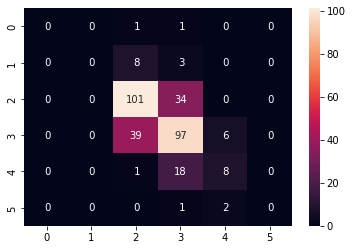

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

C:\Users\AMITAVA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


0.6027989665354331

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [16]:
accuracy

0.64375

In [17]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,refit=True,verbose=3)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10] END ...............C=1, kernel=linear;, score=0.586 total time=   0.1s


C:\Users\AMITAVA\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


[CV 2/10] END ...............C=1, kernel=linear;, score=0.547 total time=   0.1s
[CV 3/10] END ...............C=1, kernel=linear;, score=0.586 total time=   0.1s
[CV 4/10] END ...............C=1, kernel=linear;, score=0.555 total time=   0.1s
[CV 5/10] END ...............C=1, kernel=linear;, score=0.547 total time=   0.1s
[CV 6/10] END ...............C=1, kernel=linear;, score=0.539 total time=   0.1s
[CV 7/10] END ...............C=1, kernel=linear;, score=0.648 total time=   0.1s
[CV 8/10] END ...............C=1, kernel=linear;, score=0.555 total time=   0.1s
[CV 9/10] END ...............C=1, kernel=linear;, score=0.555 total time=   0.1s
[CV 10/10] END ..............C=1, kernel=linear;, score=0.591 total time=   0.1s
[CV 1/10] END ..............C=10, kernel=linear;, score=0.570 total time=   0.5s
[CV 2/10] END ..............C=10, kernel=linear;, score=0.555 total time=   0.5s
[CV 3/10] END ..............C=10, kernel=linear;, score=0.578 total time=   0.5s
[CV 4/10] END ..............

[CV 4/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.609 total time=   0.1s
[CV 5/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.672 total time=   0.1s
[CV 6/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.625 total time=   0.1s
[CV 7/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.695 total time=   0.1s
[CV 8/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.633 total time=   0.2s
[CV 9/10] END .......C=1, gamma=0.7, kernel=rbf;, score=0.602 total time=   0.1s
[CV 10/10] END ......C=1, gamma=0.7, kernel=rbf;, score=0.661 total time=   0.1s
[CV 1/10] END .......C=1, gamma=0.8, kernel=rbf;, score=0.562 total time=   0.2s
[CV 2/10] END .......C=1, gamma=0.8, kernel=rbf;, score=0.594 total time=   0.2s
[CV 3/10] END .......C=1, gamma=0.8, kernel=rbf;, score=0.641 total time=   0.2s
[CV 4/10] END .......C=1, gamma=0.8, kernel=rbf;, score=0.602 total time=   0.2s
[CV 5/10] END .......C=1, gamma=0.8, kernel=rbf;, score=0.664 total time=   0.2s
[CV 6/10] END .......C=1, ga

[CV 6/10] END ......C=10, gamma=0.8, kernel=rbf;, score=0.633 total time=   0.2s
[CV 7/10] END ......C=10, gamma=0.8, kernel=rbf;, score=0.656 total time=   0.2s
[CV 8/10] END ......C=10, gamma=0.8, kernel=rbf;, score=0.609 total time=   0.2s
[CV 9/10] END ......C=10, gamma=0.8, kernel=rbf;, score=0.648 total time=   0.2s
[CV 10/10] END .....C=10, gamma=0.8, kernel=rbf;, score=0.701 total time=   0.2s
[CV 1/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.602 total time=   0.2s
[CV 2/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.539 total time=   0.2s
[CV 3/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.617 total time=   0.2s
[CV 4/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.570 total time=   0.2s
[CV 5/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.656 total time=   0.2s
[CV 6/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.633 total time=   0.2s
[CV 7/10] END ......C=10, gamma=0.9, kernel=rbf;, score=0.664 total time=   0.2s
[CV 8/10] END ......C=10, ga

[CV 8/10] END .....C=100, gamma=0.9, kernel=rbf;, score=0.633 total time=   0.2s
[CV 9/10] END .....C=100, gamma=0.9, kernel=rbf;, score=0.648 total time=   0.2s
[CV 10/10] END ....C=100, gamma=0.9, kernel=rbf;, score=0.693 total time=   0.2s
[CV 1/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.4s
[CV 2/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.523 total time=   0.4s
[CV 3/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.578 total time=   0.4s
[CV 4/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.4s
[CV 5/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.4s
[CV 6/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.609 total time=   0.4s
[CV 7/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.4s
[CV 8/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.602 total time=   0.5s
[CV 9/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.570 total time=   0.4s
[CV 10/10] END ...C=1000, ga

0.6310039370078739

In [18]:
#and here is best parameters
best_parameters

{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}

In [42]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.8)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

In [43]:
accuracy=accuracy_score(y_test,y_pred)

In [44]:
accuracy

0.69375